In [1]:
# Importando as bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import scienceplots
from scipy import signal

#Exibição dos gráficos em janela externa:
#%matplotlib qt

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 16 
plt.rcParams['figure.figsize'] = (12, 6)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


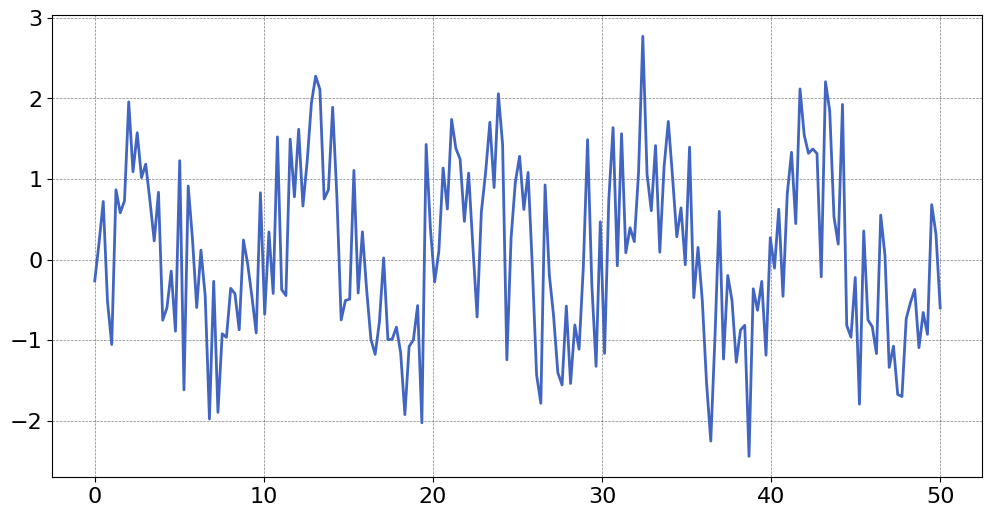

In [2]:
rng = np.random.default_rng()
t = np.linspace(0, 50, 200)
sig = np.sin(2*np.pi*0.1*t)
sig_noise = rng.standard_normal(len(sig))
sig_noise  /= np.max(sig_noise)
sig_noise *= 2
sig_noise = (sig_noise+sig)

plt.figure(1)
plt.plot(t, sig_noise)
plt.savefig('noise.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


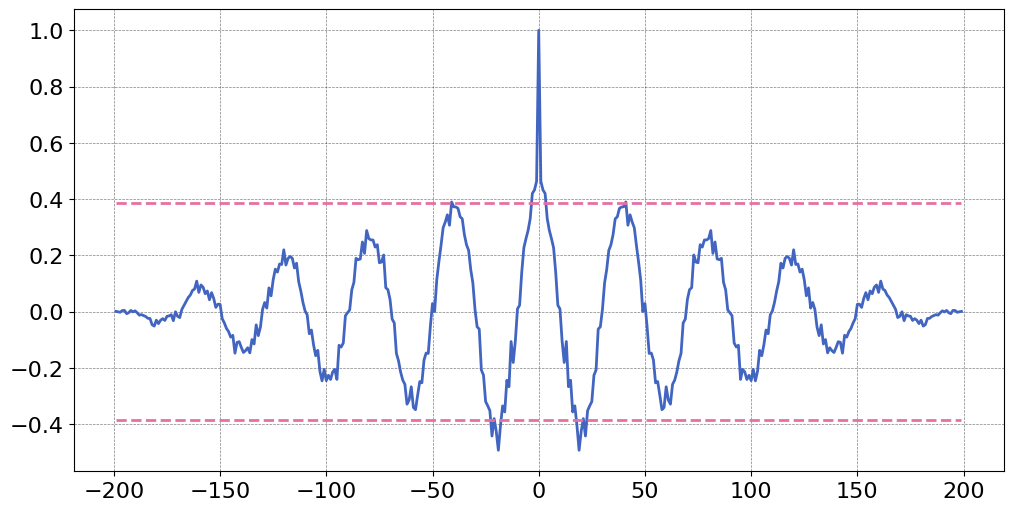

In [3]:
autcorr = signal.correlate(sig_noise, sig_noise)
autcorr /= np.max(autcorr)
sr = np.std(autcorr)
lags = signal.correlation_lags(sig_noise.size, sig_noise.size, mode="full")

plt.figure(2)
plt.plot(lags, autcorr)
plt.plot(lags, ((-1.96*sr)*np.ones(len(lags))), color = 'C1', linestyle='dashed')
plt.plot(lags, ((+1.96*sr)*np.ones(len(lags))), color = 'C1', linestyle='dashed')
plt.savefig('correl.eps', dpi=600, transparent=True, bbox_inches='tight')